In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [262]:
airbnb = pd.read_csv('C:\\Users\\Gebruiker\\Downloads\\archive\\Airbnb_Open_Data.csv')

In [263]:
airbnb.shape

(102599, 26)

In [264]:
airbnb.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [265]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [266]:
# Removing the Duplicates
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)

In [267]:
# Let's check the null values in each column
airbnb.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            404
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       400
number of reviews                    183
last review                        15832
reviews per month                  15818
review rate number                   319
calculated host listings count       319
availability 365                     489
house_rules     

In [268]:
# Droping unnecessary columns
airbnb.drop(['NAME','id','host name','last review','host_identity_verified','country','country code','instant_bookable','cancellation_policy','Construction year','service fee','review rate number','house_rules','license'], axis=1, inplace=True)

In [269]:
airbnb.head(3)

,host id,neighbourhood group,neighbourhood,lat,long,room type,price,minimum nights,number of reviews,reviews per month,calculated host listings count,availability 365
0,80014485718,Brooklyn,Kensington,40.64749,-73.97237,Private room,$966,10.0,9.0,0.21,6.0,286.0
1,52335172823,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,$142,30.0,45.0,0.38,2.0,228.0
2,78829239556,Manhattan,Harlem,40.80902,-73.94190,Private room,$620,3.0,0.0,NaN,1.0,352.0


In [270]:
# Removing the NaN values
airbnb.isnull().sum()
airbnb.dropna(how='any',inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85125 entries, 0 to 102057
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host id                         85125 non-null  int64  
 1   neighbourhood group             85125 non-null  object 
 2   neighbourhood                   85125 non-null  object 
 3   lat                             85125 non-null  float64
 4   long                            85125 non-null  float64
 5   room type                       85125 non-null  object 
 6   price                           85125 non-null  object 
 7   minimum nights                  85125 non-null  float64
 8   number of reviews               85125 non-null  float64
 9   reviews per month               85125 non-null  float64
 10  calculated host listings count  85125 non-null  float64
 11  availability 365                85125 non-null  float64
dtypes: float64(7), int64(1), object(4)
m

In [271]:
# Price datatype is object. This is a problem
# Remove non-numeric characters from 'price' column
airbnb['price'] = airbnb['price'].str.replace('[^\d.]', '', regex=True)

# Convert 'price' column to numeric
airbnb['price'] = pd.to_numeric(airbnb['price'])
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85125 entries, 0 to 102057
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host id                         85125 non-null  int64  
 1   neighbourhood group             85125 non-null  object 
 2   neighbourhood                   85125 non-null  object 
 3   lat                             85125 non-null  float64
 4   long                            85125 non-null  float64
 5   room type                       85125 non-null  object 
 6   price                           85125 non-null  int64  
 7   minimum nights                  85125 non-null  float64
 8   number of reviews               85125 non-null  float64
 9   reviews per month               85125 non-null  float64
 10  calculated host listings count  85125 non-null  float64
 11  availability 365                85125 non-null  float64
dtypes: float64(7), int64(2), object(3)
m

In [272]:
airbnb.columns

Index(['host id', 'neighbourhood group', 'neighbourhood', 'lat', 'long',
       'room type', 'price', 'minimum nights', 'number of reviews',
       'reviews per month', 'calculated host listings count',
       'availability 365'],
      dtype='object')

In [273]:
# Performing exploratory data analysis
airbnb.head()

,host id,neighbourhood group,neighbourhood,lat,long,room type,price,minimum nights,number of reviews,reviews per month,calculated host listings count,availability 365
0,80014485718,Brooklyn,Kensington,40.64749,-73.97237,Private room,966,10.0,9.0,0.21,6.0,286.0
1,52335172823,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,142,30.0,45.0,0.38,2.0,228.0
3,85098326012,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,368,30.0,270.0,4.64,1.0,322.0
4,92037596077,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,204,10.0,9.0,0.10,1.0,289.0
5,45498551794,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,577,3.0,74.0,0.59,1.0,374.0


In [274]:
airbnb.describe()

,host id,lat,long,price,minimum nights,number of reviews,reviews per month,calculated host listings count,availability 365
count,8.512500e+04,85125.000000,85125.000000,85125.000000,85125.000000,85125.000000,85125.000000,85125.000000,85125.000000
mean,4.918813e+10,40.727420,-73.409864,626.194819,7.449821,32.332957,1.375457,7.030567,141.869557
std,2.852538e+10,0.056355,8.909685,331.698527,28.021864,51.991453,1.747111,29.441589,133.334031
min,1.236005e+08,40.504560,-74.249840,50.000000,-365.000000,1.000000,0.010000,1.000000,0.000000
25%,2.446797e+10,40.687660,-73.982040,341.000000,2.000000,3.000000,0.220000,1.000000,7.000000
50%,4.903699e+10,40.721380,-73.953570,625.000000,3.000000,11.000000,0.740000,1.000000,101.000000
75%,7.385110e+10,40.762690,-73.930380,914.000000,5.000000,38.000000,2.010000,2.000000,266.000000
max,9.876313e+10,40.916970,74.100920,1200.000000,5645.000000,1024.000000,90.000000,332.000000,426.000000


In [275]:
airbnb['neighbourhood'].value_counts()  # Count of listings in each neighbourhood

neighbourhood
Bedford-Stuyvesant        6892
Williamsburg              6448
Harlem                    4678
Bushwick                  4054
Hell's Kitchen            3253
                          ... 
Gerritsen Beach              3
Glen Oaks                    2
Woodrow                      1
Chelsea, Staten Island       1
New Dorp                     1
Name: count, Length: 223, dtype: int64

In [276]:
!pip install scipy

Index(['host id', 'neighbourhood group', 'neighbourhood', 'lat', 'long',
       'room type', 'price', 'minimum nights', 'number of reviews',
       'reviews per month', 'calculated host listings count',
       'availability 365'],
      dtype='object')

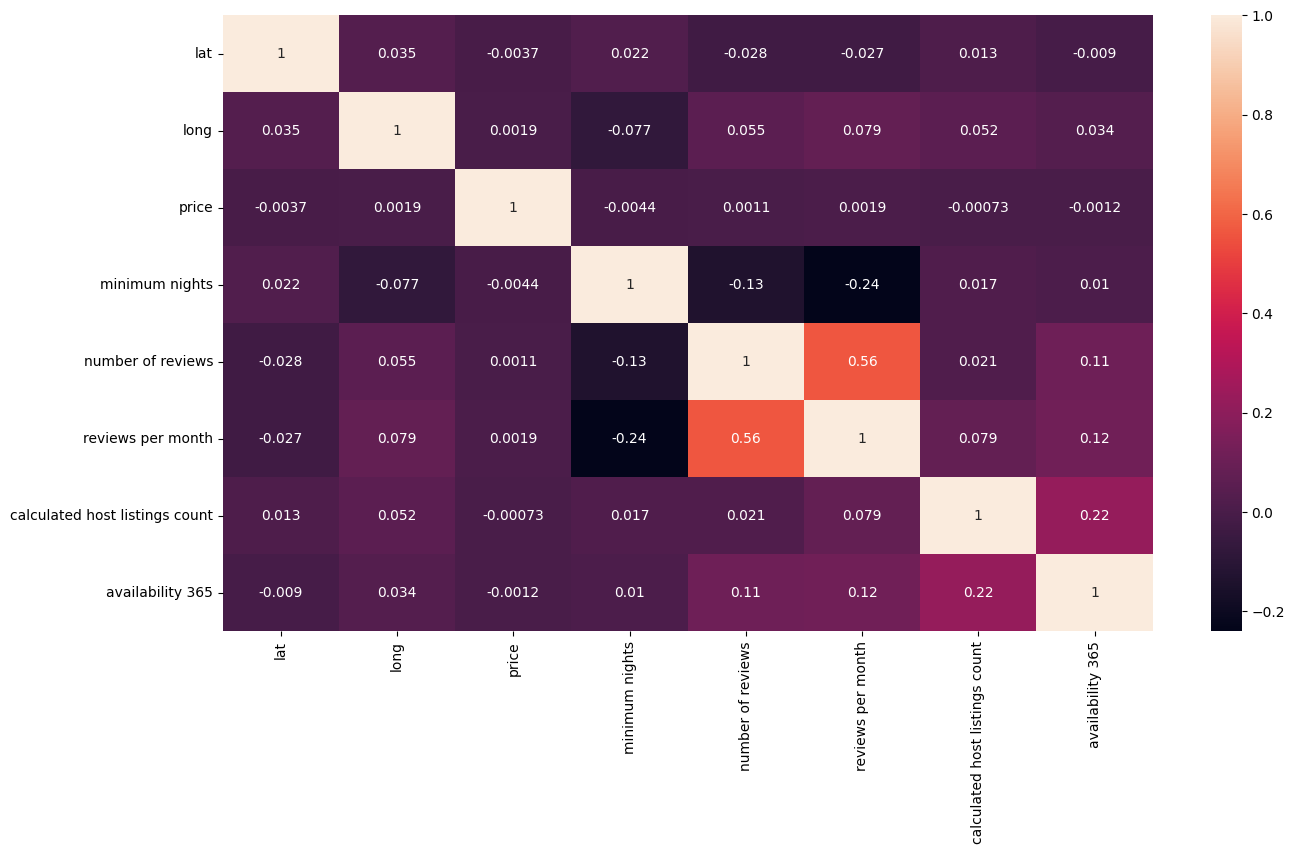

In [277]:
#Let's get the correlation 
#correlation = airbnb[['lat', 'long', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']].corr(method='kendall')
#print(correlation)
new_airbnb = airbnb.drop(columns=['host id', 'neighbourhood group', 'neighbourhood','room type'], inplace=False)

corr = new_airbnb.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
airbnb.columns

In [278]:
airbnb.shape

(85125, 12)

In [279]:
# Let's start to visualise
airbnb['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

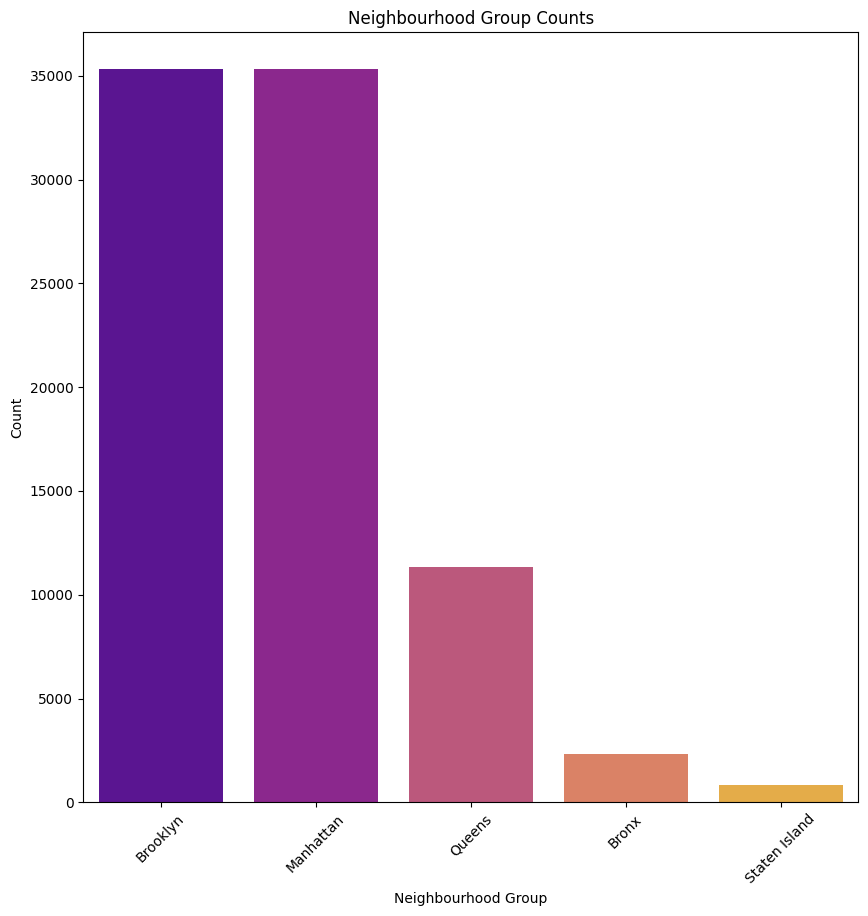

In [280]:
# Counting the occurrences of neighbourhood group
neighbourhood_counts = airbnb['neighbourhood group'].value_counts()

# Ploting the counts
sns.barplot(x=neighbourhood_counts.index, y=neighbourhood_counts, palette="plasma")
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Neighbourhood Group Counts')
plt.xticks(rotation=45)

fig = plt.gcf()
fig.set_size_inches(10, 10)

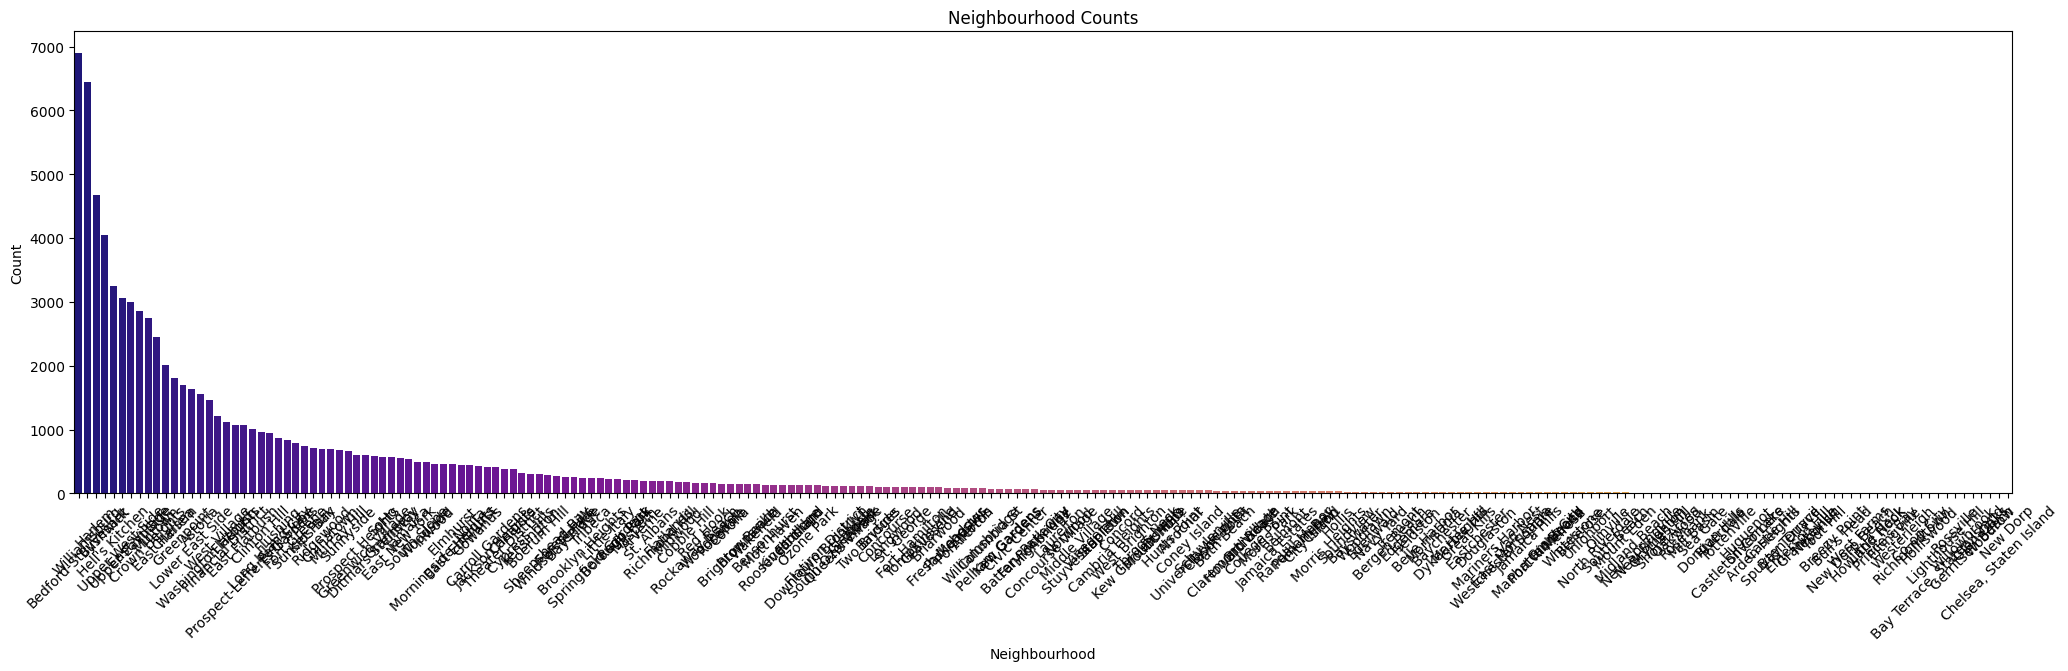

In [281]:
# Let's examine Neighbourhood
# Counting the occurrences of each category
neighbourhood_counts = airbnb['neighbourhood'].value_counts()

# Ploting the counts
sns.barplot(x=neighbourhood_counts.index, y=neighbourhood_counts, palette="plasma")
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Neighbourhood Counts')
plt.xticks(rotation=45)

fig = plt.gcf()
fig.set_size_inches(25, 6)


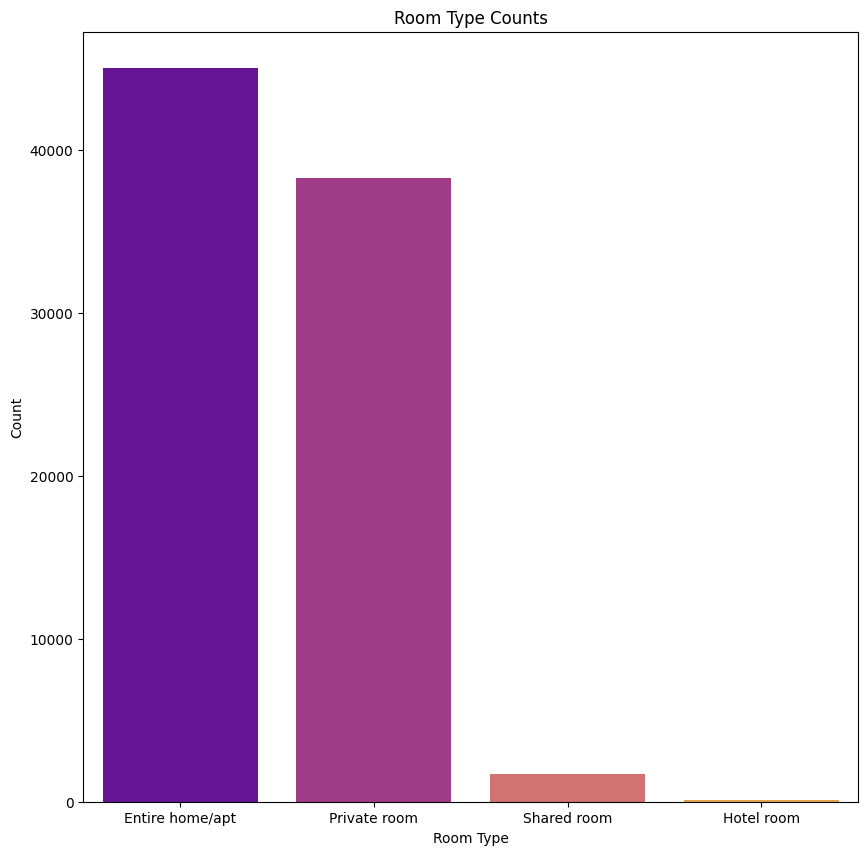

In [282]:
# This time room types
room_type_counts = airbnb['room type'].value_counts()

sns.barplot(x=room_type_counts.index, y=room_type_counts, palette="plasma")
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Room Type Counts')

fig = plt.gcf()
fig.set_size_inches(10, 10)

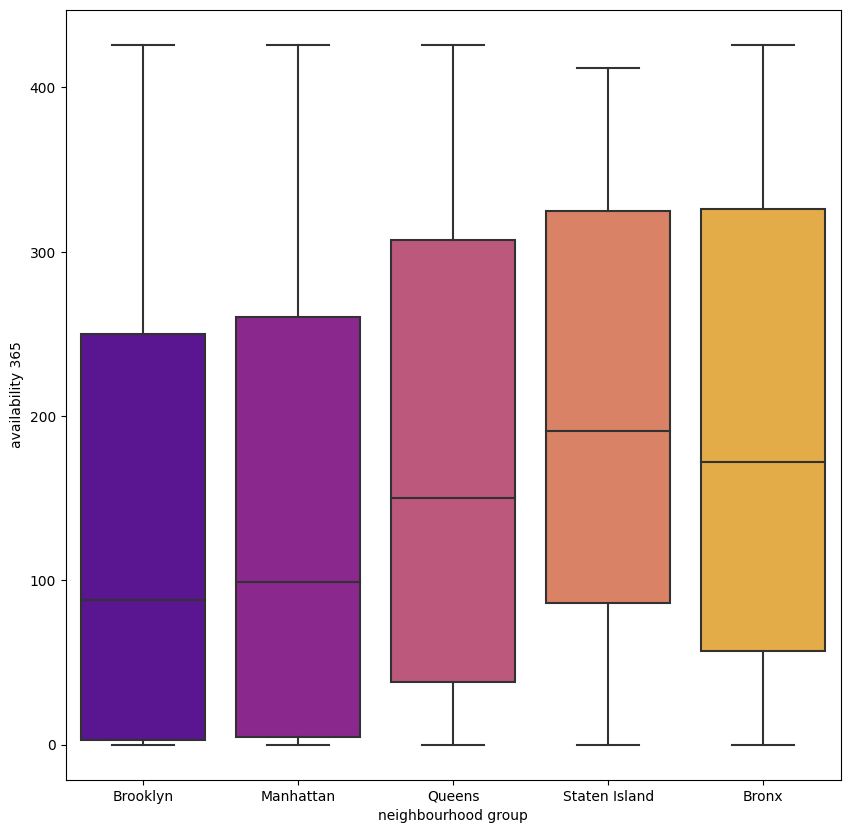

In [283]:
#Relation between neighbourgroup and Availability of Room
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb, x='neighbourhood group',y='availability 365',palette='plasma')

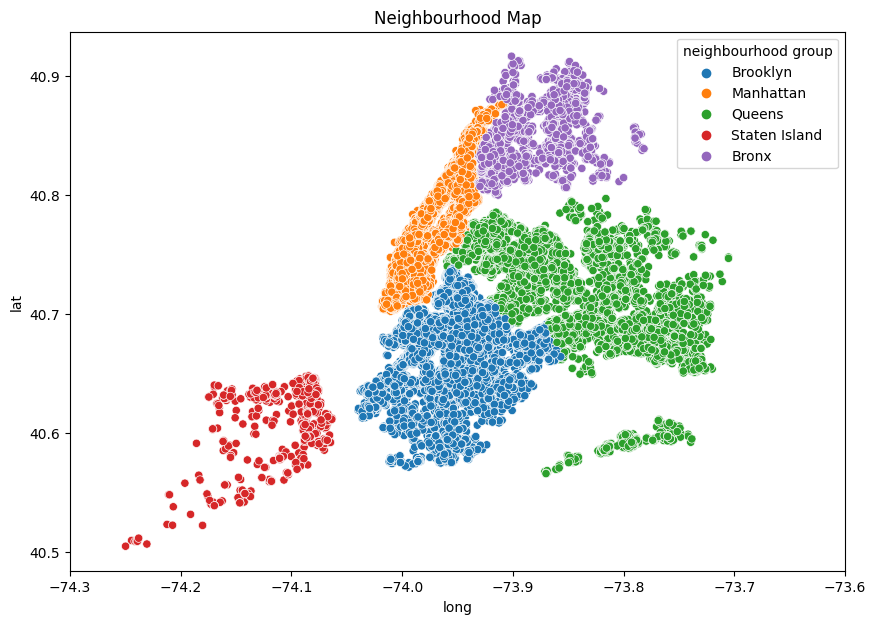

In [284]:
# Map for Neighbourhood
plt.figure(figsize=(10,7))
sns.scatterplot(data=airbnb, x='long', y='lat', hue='neighbourhood group')
plt.title('Neighbourhood Map')
plt.xlim(-74.3, -73.6)
plt.show()

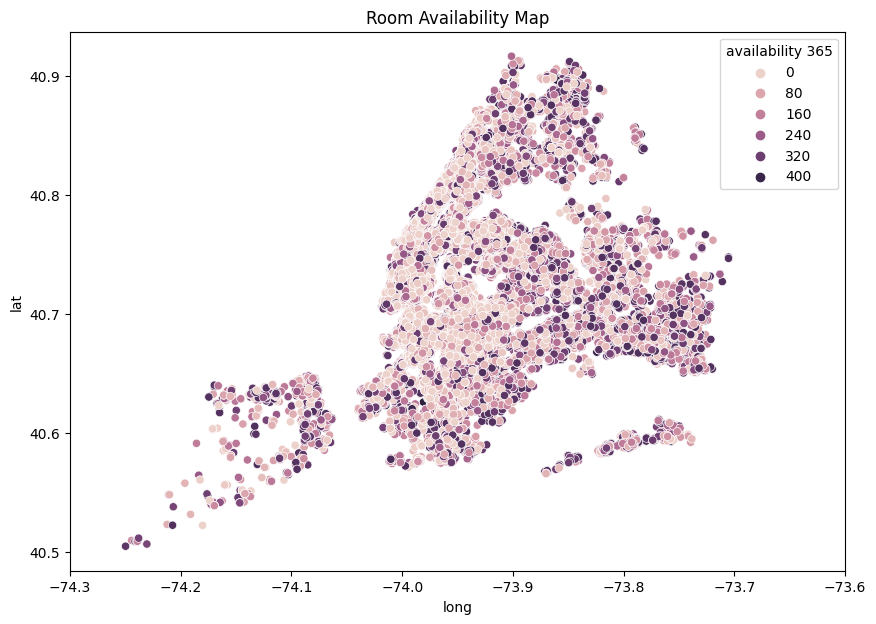

In [285]:
#Availability of room
plt.figure(figsize=(10,7))
sns.scatterplot(data=airbnb, x='long', y='lat', hue='availability 365')
plt.title('Room Availability Map')
plt.xlim(-74.3, -73.6)
plt.show()

In [286]:
!pip install wordcloud

In [287]:
# Let's visualize neighbourhood with a wordcloud
from wordcloud import WordCloud

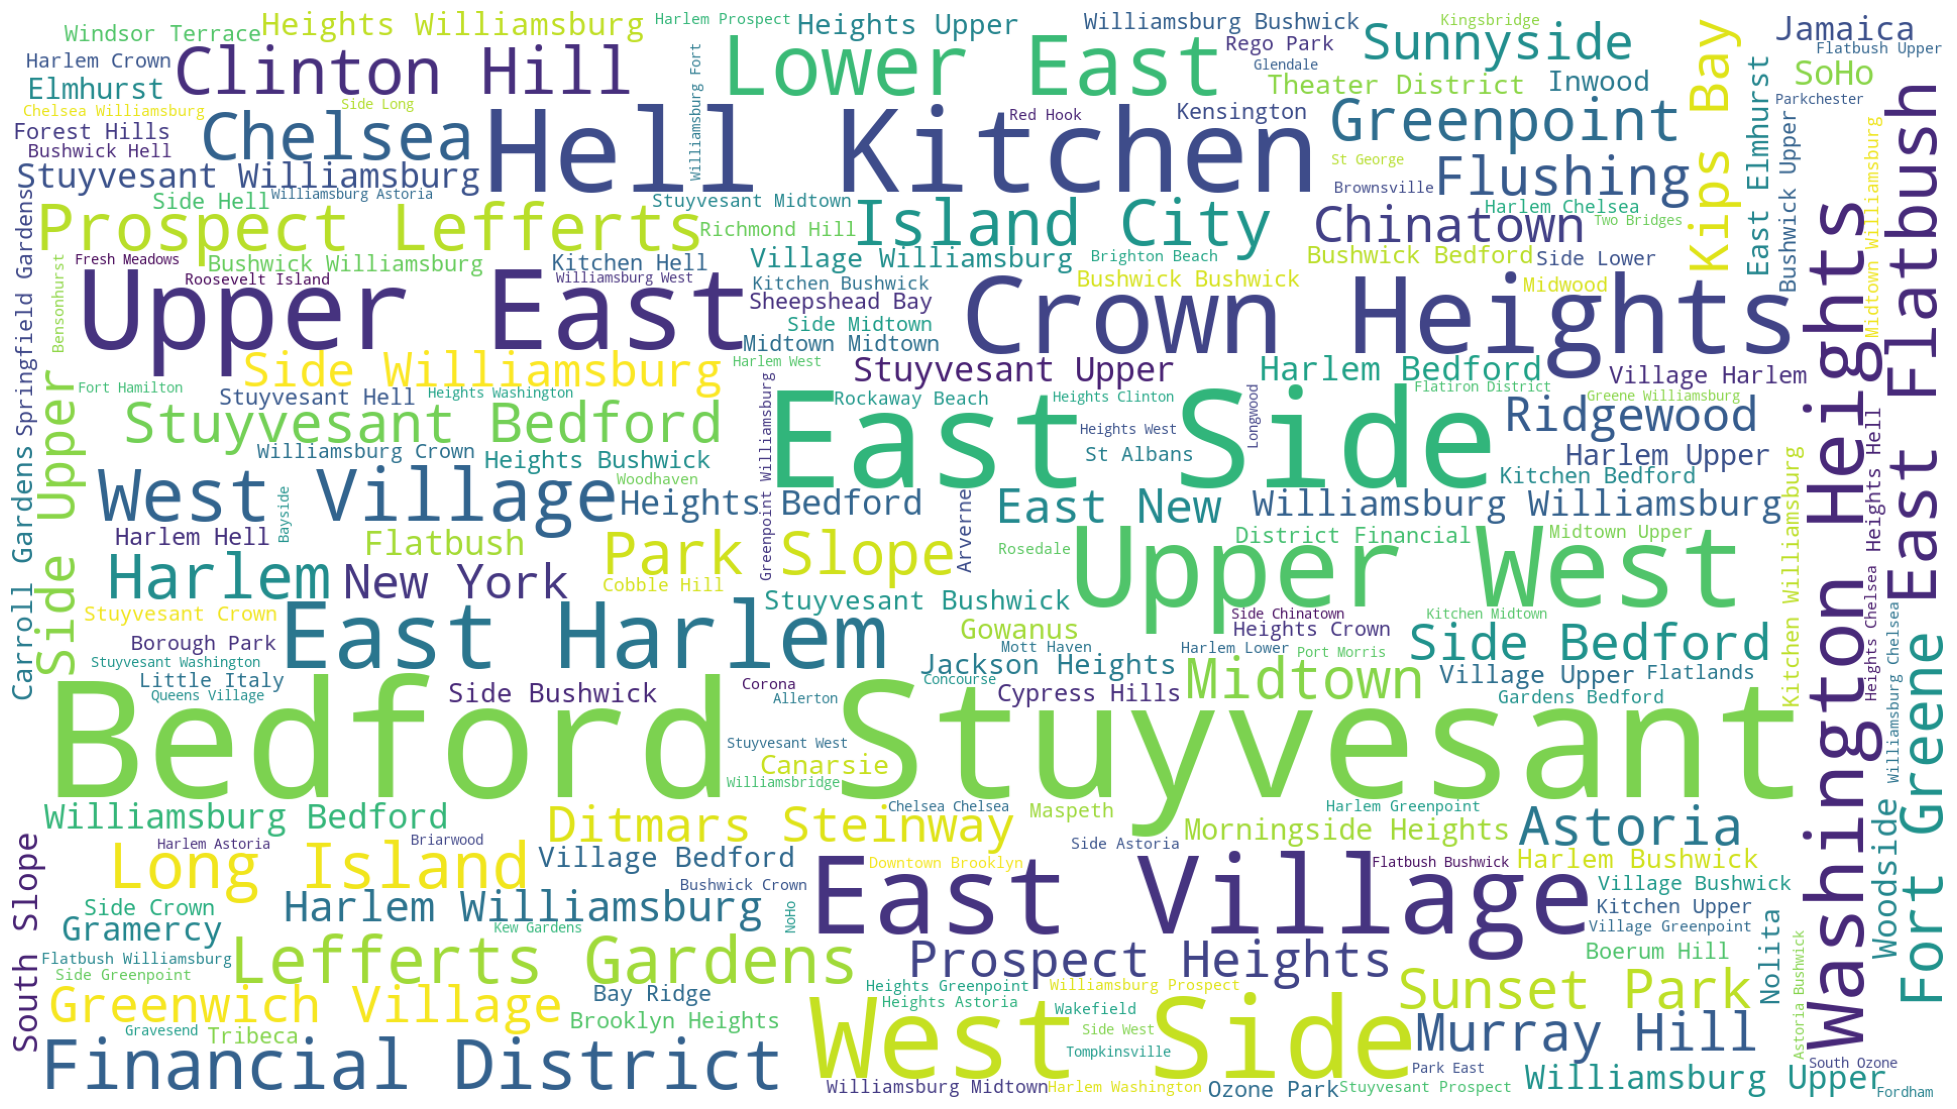

In [236]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
background_color='white', width=1920,height=1080).generate(" ".join(airbnb.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()